##Task 5: Personal Loan Acceptance Prediction

##Objective
To predict which bank customers are likely to accept a personal loan offer using supervised classification.

##Dataset Information
- Dataset Name:Bank Marketing Dataset
- Source:UCI Machine Learning Repository
- `yes`: Customer accepted the loan offer  
- `no`: Customer did not accept the offer
  
- Features Include:
  - Personal attributes (age, job, marital status, education)
  - Financial indicators (balance, housing loan, personal loan)
  - Contact and campaign data (contact method, duration, outcome of previous campaigns)

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
from sklearn.tree import DecisionTreeClassifier

In [8]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [9]:
df = pd.read_csv(r'D:\pythin\bank-additional-full.csv', sep=';')

##Initial Data Exploration

In [10]:
print("Dataset Shape:", df.shape)

Dataset Shape: (41188, 21)


In [11]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [12]:
print("\nTarget Distribution:\n", df['y'].value_counts())


Target Distribution:
 y
no     36548
yes     4640
Name: count, dtype: int64


##Data Cleaning & Encoding
##Encode target variable
- Categorical features such as `job`, `marital`, `education`, `contact`, etc., were encoded using Label Encoding.
- The target column `y` was mapped to binary format: `yes` → 1, `no` → 0.
- Dataset had no missing values and was ready for model training.


In [13]:
df['y'] = df['y'].map({'yes': 1, 'no': 0})

##Encode categorical columns

In [14]:
categorical_cols = df.select_dtypes(include='object').columns

In [15]:
le = LabelEncoder()

In [16]:
for col in categorical_cols:
    if col != 'y':
        df[col] = le.fit_transform(df[col])


##Feature-Target Split 

In [17]:
X = df.drop('y', axis=1)


In [18]:
y = df['y']

##Train-Test Split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

##Train Decision Tree Classifier 
- Algorithm Used: Decision Tree Classifier
- Max Depth: 5 (to prevent overfitting)
- Train-Test Split:80% train, 20% test
- Toolkits: pandas, scikit-learn, matplotlib, seaborn


In [20]:
clf = DecisionTreeClassifier(max_depth=5, random_state=42)

In [21]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [22]:
y_pred = clf.predict(X_test)


##Evaluation
- Accuracy Score: Printed at runtime.
- Confusion Matrix:Visualized to interpret classification quality.
- Top 10 Feature Importances: Shown using a horizontal bar chart.


In [23]:
acc = accuracy_score(y_test, y_pred)

In [24]:
cm = confusion_matrix(y_test, y_pred)

In [25]:
print(f"\nModel Accuracy: {acc:.4f}")


Model Accuracy: 0.9181


In [26]:
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[7084  226]
 [ 449  479]]


##Visualize confusion matrix

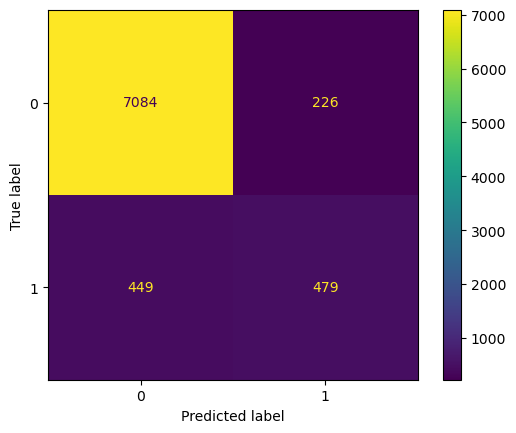

In [27]:
ConfusionMatrixDisplay(cm).plot()

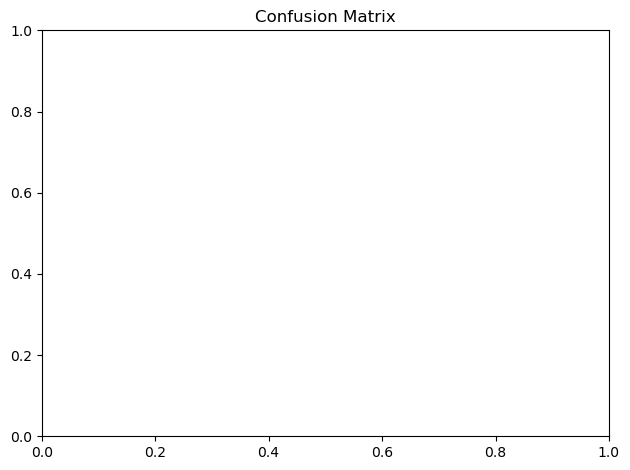

In [28]:
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

 ##Feature Importance

In [29]:
importances = pd.Series(clf.feature_importances_, index=X.columns)

In [30]:
important_features = importances.nlargest(10)

##Plot feature importance

In [31]:
plt.figure(figsize=(8, 6))

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Axes: >

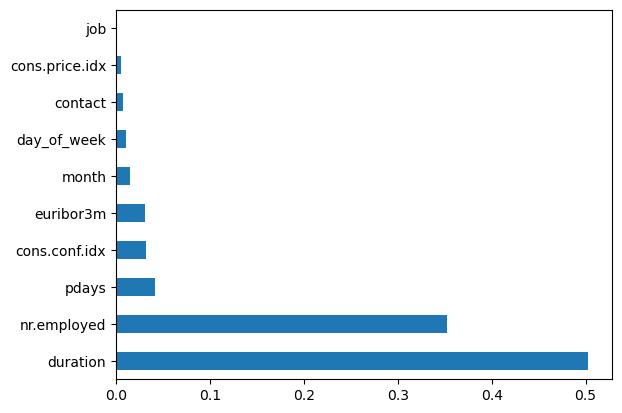

In [32]:
important_features.plot(kind='barh')

Text(0.5, 1.0, 'Top 10 Important Features')

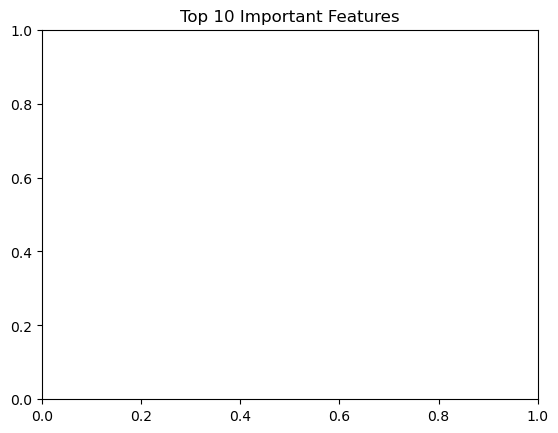

In [33]:
plt.title("Top 10 Important Features")


Text(0.5, 0, 'Importance Score')

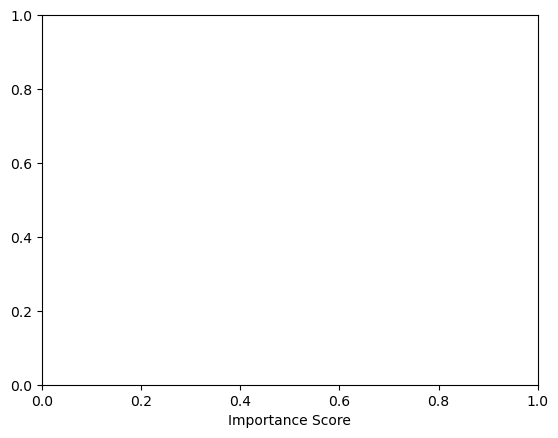

In [34]:
plt.xlabel("Importance Score")

Text(0, 0.5, 'Feature')

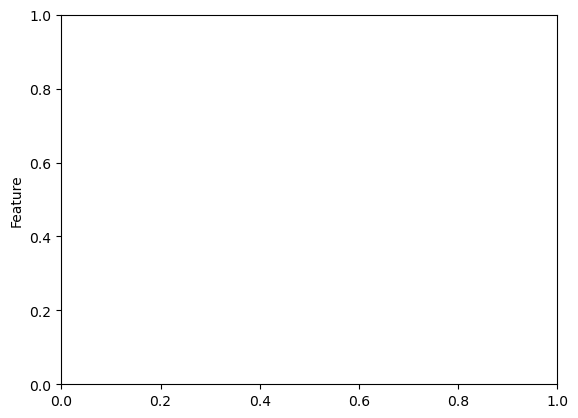

In [35]:
plt.ylabel("Feature")

In [36]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

##Results and Insights
- The model identified key predictors of loan acceptance:
  - `duration` (last contact duration)
  - `poutcome` (outcome of previous marketing campaign)
  - `contact`, `education`, and `previous` contacts
- Model showed reasonable performance for baseline prediction.
- Potential improvement with advanced models (e.g., Random Forest, XGBoost).

##Conclusion
This task helped develop:
- Classification modeling on real business data
- Feature encoding and model evaluation
- Business insights into customer behavior related to loan acceptance